Load dependency

In [1]:
using InvariantSets
using Plots # for Plotting 2D sets

### Set Computation
`InvariantSets.jl` uses the set computational libary `LazySets.jl` as backend which in terms uses `Polyhedra.jl` and `CDDLib.jl` for advanced polyhedral computations.

In this notebook, the functionality of `InvariantSets.jl` as wrapper for `LazySets.jl` is presented. We present the set types and operators from `LazySets.jl` as well as the `ᶜ`-operators which are a convenience functionality introduced in `InvariantSets.jl` for concrete set operations.

#### Polyhedral Sets

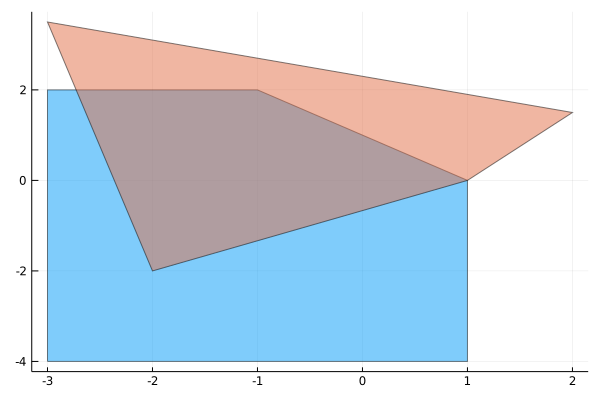

In [2]:
# Half-space representation
A = [1.0  0.0;
     0.0  1.0;
    -1.0  0.0;
     0.0 -1.0;
     1.0 1.0]
b = [1.0, 2.0, 3.0, 4.0, 1.0]
polygon = HPolygon(A,b) # bounded 2D 
polytope = HPolytope(A,b) # bounded nD
polyhedra= HPolyhedron(A,b) # unbounded nD (plotting functionality not avilable yet)

# Vertices representation
vertices =  [[1.0, 0.0], [2.0, 1.5], [-3.0, 3.5], [-2.0, -2.0]]
vpolygon = VPolygon(vertices) # bounded 2D 
vpolytope = VPolytope(vertices) # bounded nD

plot(polygon)
plot!(vpolygon)

#### Balls & Ellipsoids

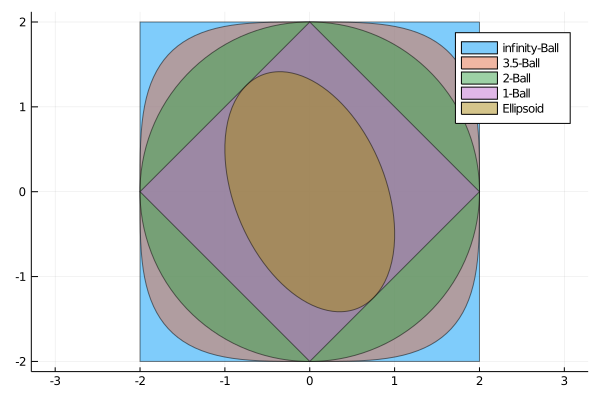

In [3]:
origin = [0.0, 0.0]
radius = 2.0
p = 3.5

ball_inf = BallInf(origin, radius)
ball_1 = Ball1(origin, radius)
ball_2 = Ball2(origin, radius)
ball_p = Ballp(p, origin, radius) 
ellipsoid = Ellipsoid(origin, [1.0 -0.5; -0.5 2.0])

plot(ball_inf, label="infinity-Ball", aspectratio=1.0)
plot!(ball_p, label="3.5-Ball")
plot!(ball_2, label="2-Ball")
plot!(ball_1, label="1-Ball")
plot!(ellipsoid, label="Ellipsoid")

#### Hyperrectangles & Zonotopes

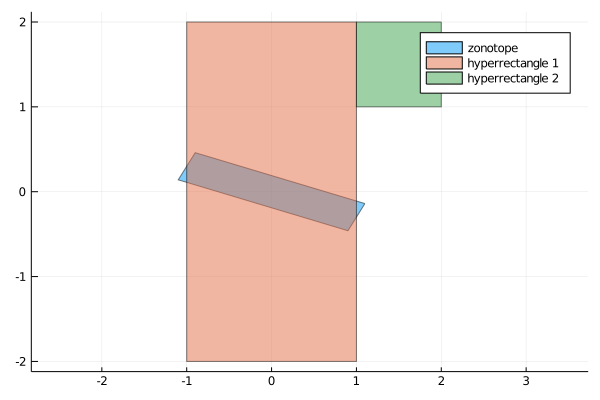

In [4]:
center = [0.0, 0.0]
generator = [[1.0, -.3], [0.1, 0.16]]
zonotope = Zonotope(center, generator)
radius = [1.0, 2.0]
hyperrectangle_1 = Hyperrectangle(center, radius)
min = [1.0, 1.0]
max = [2.0, 2.0]
hyperrectangle_2 = Hyperrectangle(low=min, high=max)
plot(zonotope, label="zonotope", aspectratio=1.0)
plot!(hyperrectangle_1, label="hyperrectangle 1")
plot!(hyperrectangle_2, label="hyperrectangle 2")


#### Other Types

In [5]:
singleton = Singleton([.5, 1.0])
vector = SingleEntryVector(2, 1,  1) # efficient creation of unit vectors
interval = Interval(0.1, 0.3)
direction = [1.0, 3.0]
direction2 = [1.0, -0.50]
distance =  2.0
hyperplane = Hyperplane(direction, distance) # (plotting functionality not avilable yet)
halfspace = HalfSpace(direction2, distance) #(plotting functionality not avilable yet)

plot(singleton, label="singleton")
plot!(interval, label="interval")
plot!(hyperplane, label="hyperplane")
plot!(halfspace, label="halfspace")
xlims!((-2, 5))
ylims!((-2, 4))

UndefVarError: UndefVarError: SingleEntryVector not defined

##### Type Conversions

In [6]:
A = [1.0  0.0;
     0.0  1.0;
    -1.0  0.0;
     0.0 -1.0;
     1.0 1.0]
b = [1.0, 2.0, 3.0, 4.0, 1.0]
polygon = HPolygon(A,b) 
vpolygon_converted = convert(VPolygon, polygon)
@show vpolygon_converted
println(polygon)
isequivalent(polygon, vpolygon_converted) # or do: polygon ⫓ vpolygon_converted


vpolygon_converted = VPolygon{Float64,Array{Float64,1}}([[-3.0, -4.0], [1.0, -4.0], [1.0, 0.0], [-1.0, 2.0], [-3.0, 2.0]])
HPolygon{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 1.0), HalfSpace{Float64,Array{Float64,1}}([1.0, 1.0], 1.0), HalfSpace{Float64,Array{Float64,1}}([0.0, 1.0], 2.0), HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 3.0), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], 4.0)])


true

### Concrete Set Operations


┌ Warning: `with_optimizer` is deprecated. Adapt the following example to update your code:
│ `with_optimizer(Ipopt.Optimizer)` becomes `Ipopt.Optimizer`.
│   caller = (::LazySets.var"#chebyshev_center##kw")(::NamedTuple{(:get_radius,),Tuple{Bool}}, ::typeof(chebyshev_center), ::HPolygon{Float64,Array{Float64,1}}) at AbstractPolyhedron_functions.jl:844
└ @ LazySets C:\Users\ueliwech\.julia\packages\LazySets\IGDBX\src\Interfaces\AbstractPolyhedron_functions.jl:844


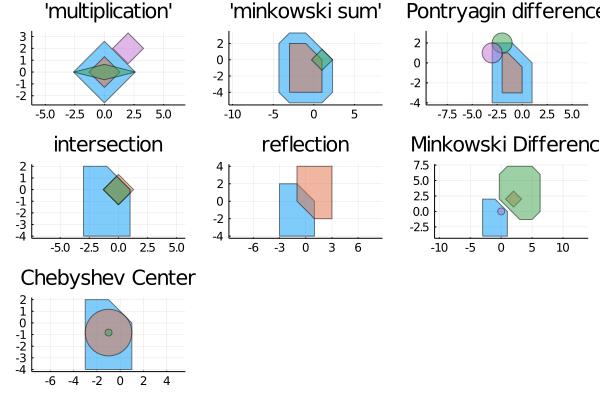

In [7]:
using Polyhedra
using CDDLib

A = [1.0  0.0;
     0.0  1.0;
    -1.0  0.0;
     0.0 -1.0;
     1.0 1.0]
b = [1.0, 2.0, 3.0, 4.0, 1.0]
origin = [0.0, 0.0]
polygon = HPolygon(A,b) 
ball = Ball1(origin, 1.3)
ball2 = Ball2(origin, 1.0)
A = [2.0 0.0; 0.0 0.5]
# Scaling
ball_scaled = 2.0 *ᶜ ball 
# Linear Map
ball_lm = A *ᶜ ball 
# Translation of ball
ball_trans = [2.0,2.0] +ᶜ ball 
# Minkowski Sum
sum = polygon +ᶜ ball
# Pontryagin Difference
diff = polygon -ᶜ ball2
# polygon_after_diff = diff + ball2
# Intersection
intersection = polygon ∩ᶜ ball
# Reflection
polygon_reflected = reflect(polygon)
# Minkowski Difference
diff_minsk = ball_trans +ᶜ polygon_reflected
# chebyshev center
c, r = InvariantSets.chebyshev_center(polygon,  get_radius=true)
chebyball = Ball2(c, r)

# Plotting
p1 = plot(ball_scaled, aspectratio=1, title="'multiplication'")
plot!(ball, label="ball")
plot!(ball_lm, label="scaled ball")
plot!(ball_trans, label="ball linear map")
p2 = plot(convert(HPolytope, sum), label="polygon + ball", aspectratio=1, title="'minkowski sum'")
plot!(polygon, label="polygon")
plot!(ball + [1.0, .0], label="ball")
plot(p1,p2)
p3 = plot(polygon, label="polygon", aspectratio=1, title="Pontryagin difference")
# plot!(polygon_after_diff, label="polygon - ball + ball")
plot!(diff, label="pyolgon - ball")
plot!(ball2 +ᶜ [-2., 2])
plot!(ball2 +ᶜ [-3., 1])
p4 = plot(polygon, label="polygon", aspectratio=1, title="intersection")
plot!(ball)
plot!(intersection)
p5 = plot(polygon, label="polygon", aspectratio=1, title="reflection")
plot!(polygon_reflected)
p6 = plot(polygon, label="polygon", aspectratio=1, title="Minkowski Difference")
plot!(ball_trans)
plot!(convert(HPolytope, diff_minsk))
plot!(Singleton([0.,0.0]))
p7 = plot(polygon, label="polygon", aspectratio=1, title="Chebyshev Center")
plot!(chebyball)
plot!(Singleton(c))

plot(p1, p2, p3, p4, p5, p6, p7, label="")

### Methods for sets

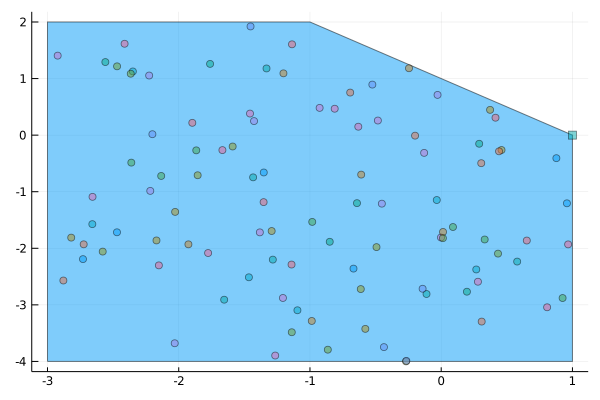

In [8]:
# Informations on set
InvariantSets.dim(polygon)
tosimplehrep(polygon)
isbounded(polygon)

# Support Value and Vector
d = rand(2)
support_value = ρ(d, polygon)
support_vector = σ(d, polygon)

# Inclusions
point = rand(2)
point ∈ polygon
is_interior_point(point, polygon)
ball ⊆ polygon
ball ⊆ polygon && polygon ⊆ ball
ball == polygon 

# Sampling
elem = an_element(polygon)
import Distributions
samples = InvariantSets.sample(polygon, 100)
plot(polygon)
plot!.(Singleton.(samples))[1]
plot!(Singleton(elem), marker=:rect)

### Lazy Set Operations

ρ(d, lazyset) = 67.58502414633628
projection_matrix = [1.0 (zeros(n - 1))'; 0 1 (zeros(n - 2))'] = [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


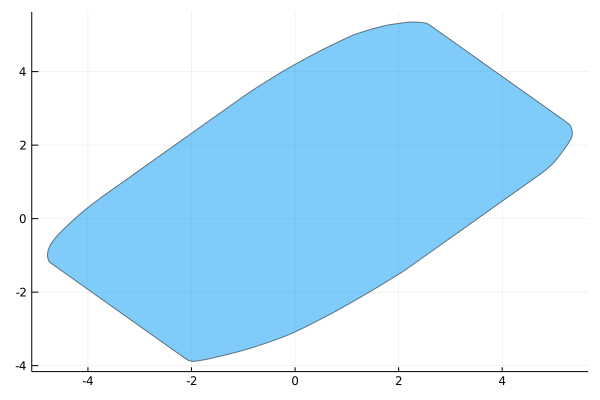

In [9]:
n = 50
A = rand(10*n, n) .- 0.5
b = rand(10*n)
polygon = HPolytope(A,b)
isbounded(polygon)
ball = Ball1(zeros(n), 1.3)
M = rand(n,n)
lazyset = rand(n) + (M*polygon + 2 * ball) 
d = rand(n)
@show ρ(d, lazyset)

@show projection_matrix = [1. zeros(n-1)'; 0 1 zeros(n-2)']
lazysetprojection = projection_matrix*lazyset

plot(lazysetprojection)

# # using Pkg
# # Pkg.add("Optim")
# using Optim #for intersection
# intersection = polygon ∩ ball
